In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas do Sklearn para pré-processamento, modelagem e avaliação
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Importando bibliotecas do Keras para construção e treinamento da rede neural
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [175]:
ds = pd.read_csv("./Salary Data.csv")

print("Estatísticas descritivas do dataset:")
print(ds.describe())
print("\nDados ausentes por coluna:")
print(ds.isnull().sum())

Estatísticas descritivas do dataset:
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000

Dados ausentes por coluna:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [176]:
ds['Gender'] = LabelEncoder().fit_transform(ds['Gender']) 
ds['Education Level'] = LabelEncoder().fit_transform(ds['Education Level'])
ds['Job Title'] = LabelEncoder().fit_transform(ds['Job Title'])

In [177]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

# Fazendo a normalização das variaveis independentes
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [194]:
# ----- Modelo de Rede Neural (ANN) -----

# Definição da arquitetura da rede neural sequencial
ann = Sequential()
ann.add(Dense(units=128, activation='relu'))  # Camada de entrada com 128 neurônios e ativação ReLU
ann.add(Dropout(0.1))  # Camada de Dropout para prevenir overfitting
ann.add(Dense(units=64, activation='relu'))  # Camada oculta com 64 neurônios e ativação ReLU
ann.add(Dropout(0.1))  # Outra camada de Dropout
ann.add(Dense(units=1, activation='linear'))  # Camada de saída com ativação linear para regressão

# Compilação do modelo com o otimizador Adam e a função de perda MSE
optimizer = Adam(learning_rate=0.001)
ann.compile(optimizer=optimizer, loss='mean_squared_error')

# Definição do callback para parada antecipada caso a validação não melhore após 10 épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Treinamento do modelo de rede neural com validação e callback de parada antecipada
ann.fit(X_train, y_train, validation_split=0.1, epochs=500, callbacks=[early_stopping])



Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.8338 - val_loss: 0.1663
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1512 - val_loss: 0.1346
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1250 - val_loss: 0.1170
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1206 - val_loss: 0.1060
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1362 - val_loss: 0.1023
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1007 - val_loss: 0.1009
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0960 - val_loss: 0.0994
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1126 - val_loss: 0.0955
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0946 - val_loss: 0.0932
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0909 - val_loss: 0.0981
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0973 - val_loss: 0.1029
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

In [182]:
# ----- Modelo de Random Forest -----
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=50)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=50)

In [195]:
# ----- Previsões e Avaliação dos Modelos -----

# Previsão dos salários no conjunto de teste utilizando a rede neural
y_pred_ann = ann.predict(X_test)
# Reversão da normalização para obter os valores reais de salário
y_pred_ann = scaler_y.inverse_transform(y_pred_ann)
y_test_actual = scaler_y.inverse_transform(y_test)

# Cálculo do R² para o modelo de rede neural
r2_ann = r2_score(y_test_actual, y_pred_ann)
print(f"R2 Score para a Rede Neural: {r2_ann}")

# Previsão dos salários no conjunto de teste utilizando o Random Forest
y_pred_rf = best_rf.predict(X_test)
# Redimensionamento e reversão da normalização
y_pred_rf = y_pred_rf.reshape(-1, 1)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf)

# Cálculo do R² para o modelo de Random Forest
r2_rf = r2_score(y_test_actual, y_pred_rf)
print(f"R2 Score para o Random Forest: {r2_rf}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
R2 Score para a Rede Neural: 0.9582895918393266
R2 Score para o Random Forest: 0.9584914572877129


In [196]:
# ----- Critérios de Avaliação dos Modelos -----

# Cálculo do Erro Quadrático Médio (MSE) para a Rede Neural
mse_ann = mean_squared_error(y_test_actual, y_pred_ann)
print(f"Mean Squared Error para a Rede Neural: {mse_ann}")

# Cálculo do Erro Absoluto Médio (MAE) para a Rede Neural
mae_ann = np.mean(np.abs(y_test_actual - y_pred_ann))
print(f"Mean Absolute Error para a Rede Neural: {mae_ann}")

# Cálculo do Erro Quadrático Médio (MSE) para o Random Forest
mse_rf = mean_squared_error(y_test_actual, y_pred_rf)
print(f"Mean Squared Error para o Random Forest: {mse_rf}")

# Cálculo do Erro Absoluto Médio (MAE) para o Random Forest
mae_rf = np.mean(np.abs(y_test_actual - y_pred_rf))
print(f"Mean Absolute Error para o Random Forest: {mae_rf}")

Mean Squared Error para a Rede Neural: 79444029.31059827
Mean Absolute Error para a Rede Neural: 6819.528371710527
Mean Squared Error para o Random Forest: 79059544.83045074
Mean Absolute Error para o Random Forest: 6636.286802867272


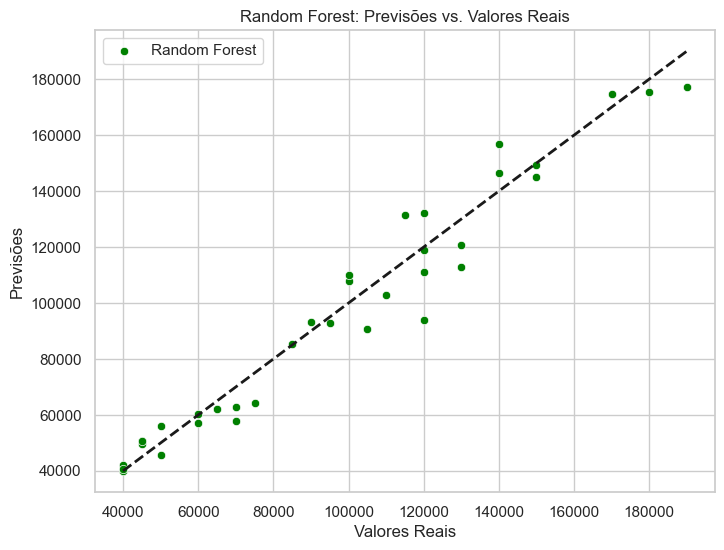

In [197]:
# Gráfico de Dispersão das Previsões vs. Valores Reais para o Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_actual.flatten(), y=y_pred_rf.flatten(), color='green', label='Random Forest')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Random Forest: Previsões vs. Valores Reais')
plt.legend()
plt.show() 

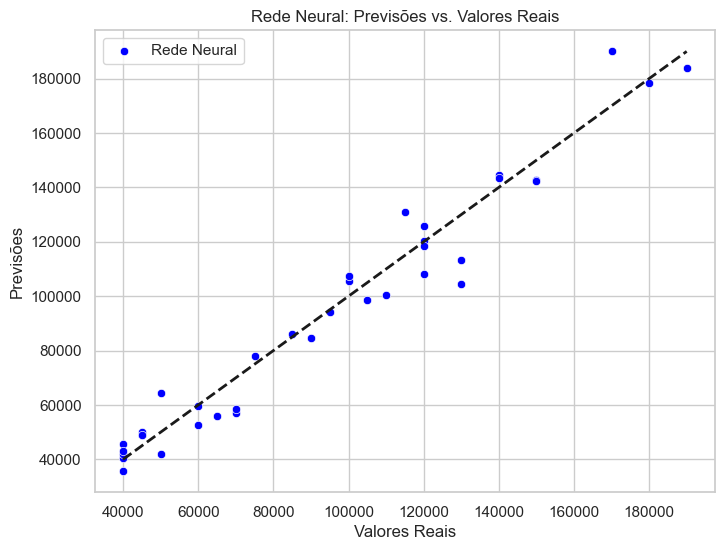

In [198]:
# Gráfico de Dispersão das Previsões vs. Valores Reais para a Rede Neural
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_actual.flatten(), y=y_pred_ann.flatten(), color='blue', label='Rede Neural')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Rede Neural: Previsões vs. Valores Reais')
plt.legend()
plt.show()